In [1]:
from glob import glob
import re
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from natsort import natsorted
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
colors_=['#ADD8E6','#87CEFA','#87CEEB','#00BFFF','#B0C4DE','#1E90FF','#6495ED','#4682B4','#4169E1',
         '#0000FF','#0000CD','#00008B','#000080','#191970','#7B68EE','#6A5ACD','#483D8B']

In [3]:
logs = natsorted(glob('/Users/gil_f.hoben/Troponin_md_processed/TnC_TnI_Egcg_unbound_filtered/*_write*.log'))

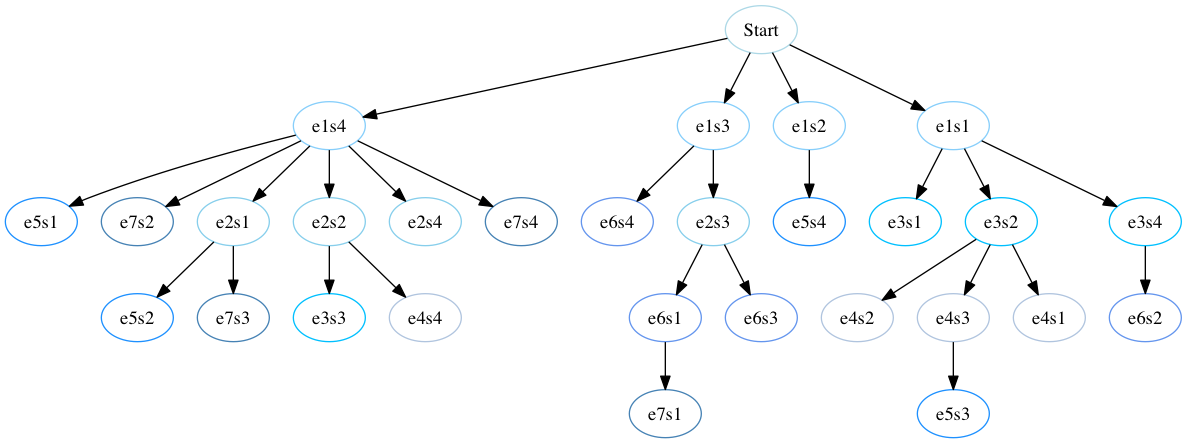

In [4]:
log_list=[]
for log in logs:    
    with open(log,'r') as log:
        log_list.append(log.readlines())
name = re.compile('e[0-9]s[0-9]')
dot = nx.DiGraph()
dot.add_node('start',{'label':'Start','color': colors_[0]})
dot.add_node('e1s1',{'color': colors_[1]})
dot.add_node('e1s2',{'color': colors_[1]})
dot.add_node('e1s3',{'color': colors_[1]})
dot.add_node('e1s4',{'color': colors_[1]})
for i, log_i in enumerate(log_list):
    for log in log_i[::2]:
        current=name.findall(log)[0]
        previous=name.findall(log)[1]
        dot.add_node(current,{'label':current, 'color':colors_[i+2]})
        dot.add_edge(previous,current)
        # connect e1 to start
        if previous[1] == '1':
            dot.add_edge('start', previous)
draw(dot)

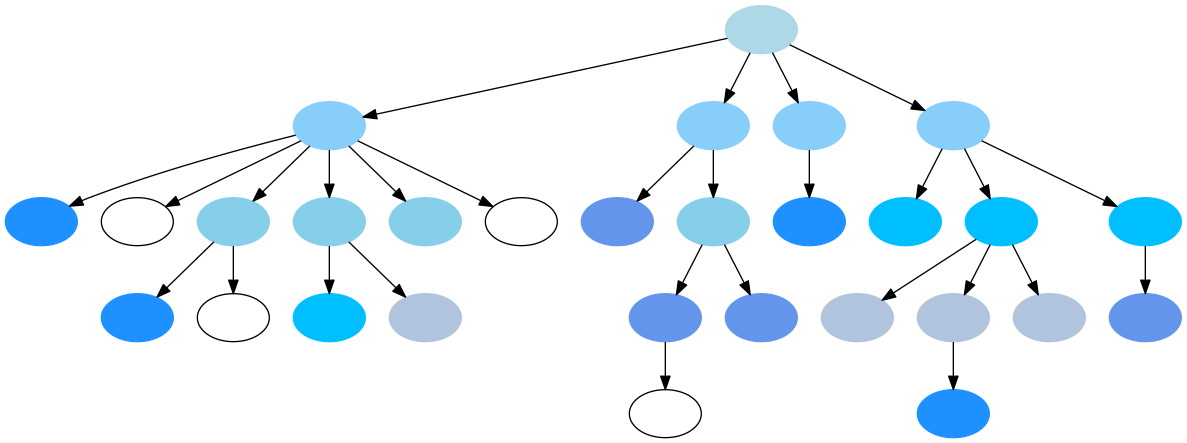

In [11]:
log_list=[]
for log in logs:    
    with open(log,'r') as log:
        log_list.append(log.readlines())
name = re.compile('e[0-9]+s[0-9]+')
dot = nx.DiGraph()
dot.add_node('Start',{'label':' ','color': colors_[0],'style':'filled','fillcolor':colors_[0]})
for i, log_i in enumerate(log_list):
    for log in log_i[::2]:
        current=name.findall(log)[0]
        previous=name.findall(log)[1]
        if i+1 < len(log_list):
            dot.add_node(current,{'label':' ', 'color': colors_[i+2],'style':'filled','fillcolor':colors_[i+2]})
        else:
            dot.add_node(current,{'label':' ', 'color': 'black','style':'filled','fillcolor':'white'})
        dot.add_edge(previous,current)
        # connect e1 to start
        if previous[1] == '1':
            dot.add_edge('Start', previous)
            dot.add_node(previous,{'label':' ','color': colors_[1],'style':'filled','fillcolor':colors_[1]})

draw(dot)